In [237]:
import numpy as np 
import matplotlib.pyplot as plt

In [238]:
# Set seed for reproducibility
np.random.seed(0)

In [239]:
t1 = np.array([(i+1)*0.01 for i in range(200)])

In [240]:
f1 = 10 * t1**2 - t1 + np.random.uniform(-0.01, 0.01, size=t1.shape)

In [259]:
t2 = np.array([2 + (i+1)*0.01 for i in range(200)])

In [242]:
f2 = 5 * np.sin(2 * t2 / np.pi) + np.random.uniform(-0.01, 0.01, size=t2.shape)

In [243]:
t = np.concatenate((t1, t2))
f = np.concatenate((f1, f2))


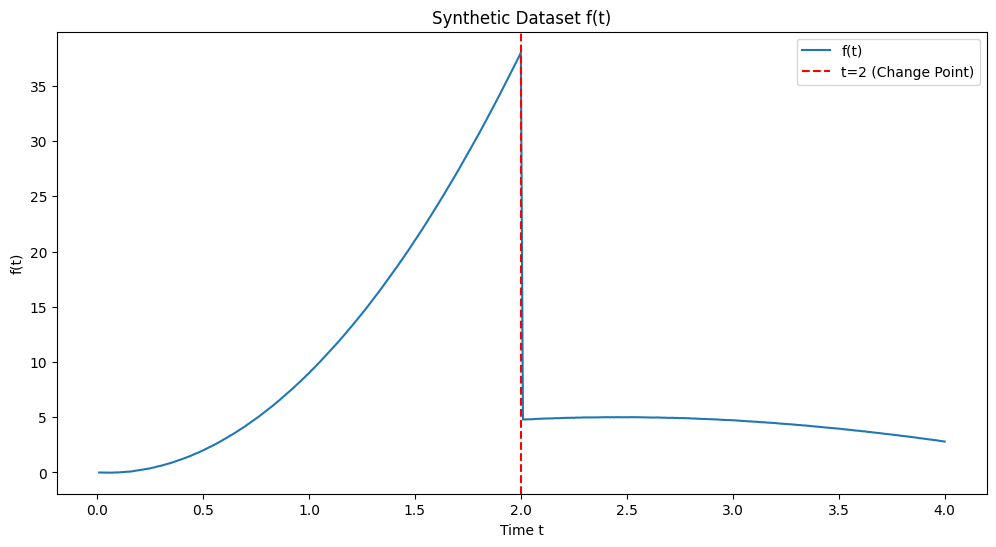

In [244]:
plt.figure(figsize=(12, 6))
plt.plot(t, f, label='f(t)')
plt.axvline(x=2, color='red', linestyle='--', label='t=2 (Change Point)')
plt.title('Synthetic Dataset f(t)')
plt.xlabel('Time t')
plt.ylabel('f(t)')
plt.legend()
plt.show()

In [245]:
# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [246]:
# LSTM are designed to handle sequences and so we'll create input sequences and corresponding target values
# Define a function to create sequences
def create_sequences(data, time_steps=5):
    X = []
    y = []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

In [247]:
# Create sequences
time_steps = 5  # Number of previous time steps to consider
X, y = create_sequences(f, time_steps)

In [248]:
# Reshape X to be [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

In [249]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [250]:
model = Sequential()
model.add(Input(shape=(time_steps, 1)))
model.add(LSTM(units=50, return_sequences=True))  # First LSTM layer with return_sequences=True
model.add(LSTM(units=50))  # Second LSTM layer
model.add(Dense(1))

In [251]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [252]:
# Define a callback to stop training when loss drops below threshold
class LossThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(LossThresholdCallback, self).__init__()
        self.threshold = threshold
    
    def on_epoch_end(self, epoch, logs=None):
        loss = logs.get('loss')
        if loss is not None and loss < self.threshold:
            print(f"\nLoss has reached below {self.threshold}, stopping training.")
            self.model.stop_training = True

# Set the threshold
threshold = 0.001

# Train the model
history = model.fit(X_train, y_train, epochs=250, batch_size=16, callbacks=[LossThresholdCallback(threshold)], verbose=1)

Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 191.7448
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 103.3459
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71.3230 
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 63.3396 
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58.0459 
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.8128 
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41.0844 
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35.5832
Epoch 9/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.2208
Epoch 10/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.7958 
Epoch 11/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.7742
Epoch 12/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.6642
Epoch 13/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.0025 
Epoch 14/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.7241 
Epoch 15/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

In [253]:
# Select values well below t = 2
test_range_below = np.arange(0.5, 1.5, 0.01)
f_test_below = 10 * test_range_below**2 - test_range_below + np.random.uniform(-0.01, 0.01, size=test_range_below.shape)

# Select values around t = 2
test_range_around = np.arange(1.8, 2.2, 0.01)
f_test_around = 10 * test_range_around**2 - test_range_around + np.random.uniform(-0.01, 0.01, size=test_range_around.shape)
f_test_around[len(test_range_around)//2:] = 5 * np.sin(2 * test_range_around[len(test_range_around)//2:] / np.pi) + np.random.uniform(-0.01, 0.01, size=(len(test_range_around) - len(test_range_around)//2))

# Select values well above t = 2
test_range_above = np.arange(2.5, 3.5, 0.01)
f_test_above = 5 * np.sin(2 * test_range_above / np.pi) + np.random.uniform(-0.01, 0.01, size=test_range_above.shape)

In [254]:
# Define a helper function to create sequences from test data
def create_test_sequences(data, time_steps=5):
    X_test = []
    for i in range(len(data) - time_steps):
        X_test.append(data[i:i + time_steps])
    return np.array(X_test)

# Create test sequences
X_test_below = create_test_sequences(f_test_below, time_steps)
X_test_around = create_test_sequences(f_test_around, time_steps)
X_test_above = create_test_sequences(f_test_above, time_steps)

# Reshape for LSTM input
X_test_below = X_test_below.reshape((X_test_below.shape[0], X_test_below.shape[1], 1))
X_test_around = X_test_around.reshape((X_test_around.shape[0], X_test_around.shape[1], 1))
X_test_above = X_test_above.reshape((X_test_above.shape[0], X_test_above.shape[1], 1))

In [255]:
# Make predictions for each range
y_pred_below = model.predict(X_test_below)
y_pred_around = model.predict(X_test_around)
y_pred_above = model.predict(X_test_above)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


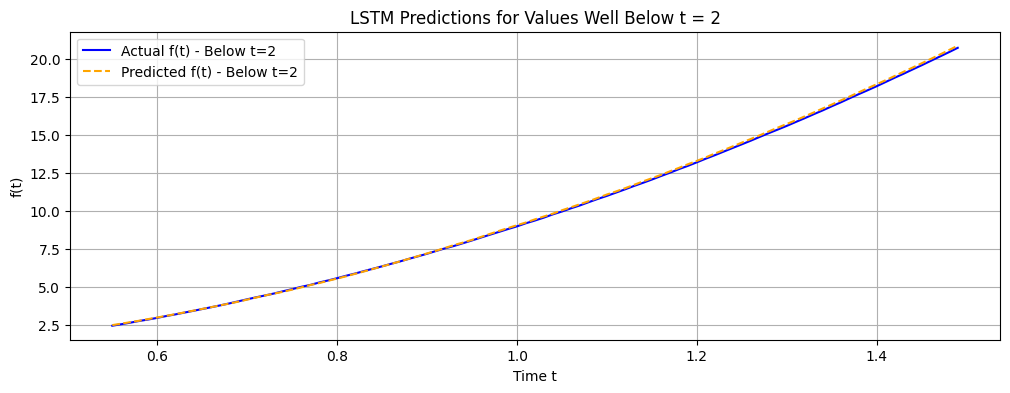

In [256]:
# Plot the actual vs predicted values for well below t = 2
plt.figure(figsize=(12, 4))
plt.plot(test_range_below[time_steps:], f_test_below[time_steps:], label='Actual f(t) - Below t=2', color='blue')
plt.plot(test_range_below[time_steps:], y_pred_below.flatten(), label='Predicted f(t) - Below t=2', linestyle='--', color='orange')
plt.title('LSTM Predictions for Values Well Below t = 2')
plt.xlabel('Time t')
plt.ylabel('f(t)')
plt.legend()
plt.grid(True)
plt.show()

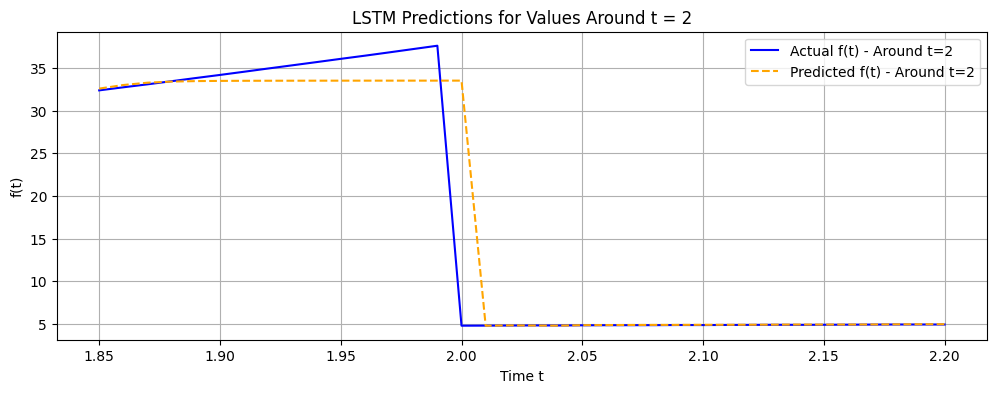

In [257]:
# Plot the actual vs predicted values around t = 2
plt.figure(figsize=(12, 4))
plt.plot(test_range_around[time_steps:], f_test_around[time_steps:], label='Actual f(t) - Around t=2', color='blue')
plt.plot(test_range_around[time_steps:], y_pred_around.flatten(), label='Predicted f(t) - Around t=2', linestyle='--', color='orange')
plt.title('LSTM Predictions for Values Around t = 2')
plt.xlabel('Time t')
plt.ylabel('f(t)')
plt.legend()
plt.grid(True)
plt.show()

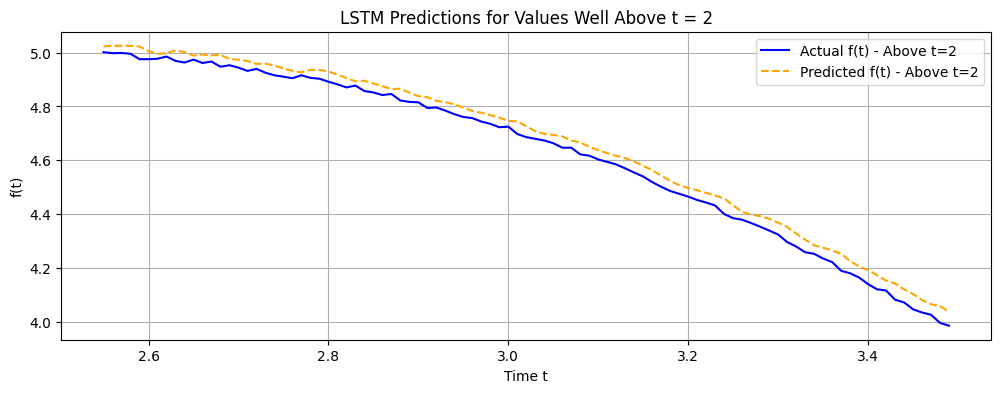

In [258]:
# Plot the actual vs predicted values for well above t = 2
plt.figure(figsize=(12, 4))
plt.plot(test_range_above[time_steps:], f_test_above[time_steps:], label='Actual f(t) - Above t=2', color='blue')
plt.plot(test_range_above[time_steps:], y_pred_above.flatten(), label='Predicted f(t) - Above t=2', linestyle='--', color='orange')
plt.title('LSTM Predictions for Values Well Above t = 2')
plt.xlabel('Time t')
plt.ylabel('f(t)')
plt.legend()
plt.grid(True)
plt.show()